We  want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Dataset Information

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

**Problem:** Predict purchase amount

## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

# Importing Libraries and Loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
sales=pd.read_csv("https://raw.githubusercontent.com/nanthasnk/Black-Friday-Sales-Prediction/master/Data/BlackFridaySales.csv")

In [3]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
sales.shape

(550068, 12)

In [5]:
# statistical info
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
#We need to change type of Age and City_Category to convert numerical.Product_Category_2 , Product_Category_3 have null datas

In [8]:
#Checking null values : 
sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
#null value % 
round(sales.isnull().sum()/sales.shape[0]*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64

In [10]:
#There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

In [11]:
# find unique values_1

sales.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [12]:
#or we can find with nunique
# find unique values_2
sales.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [13]:
#We can drop User_ID and Product_ID for model prediction as it has more unique values.

# Exploratory Data Analysis

<AxesSubplot:title={'center':'Purchase Distribution'}, xlabel='Purchase', ylabel='Density'>

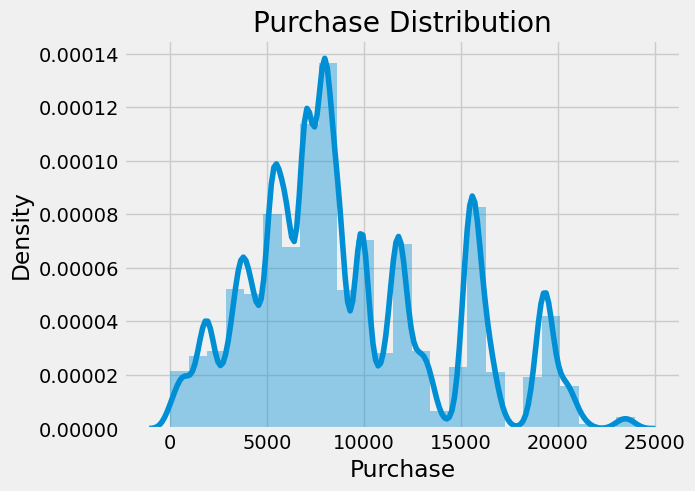

In [14]:
# distplot for purchase
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(5, 3))
plt.title("Purchase Distribution")
sns.distplot(sales['Purchase'], bins=25)

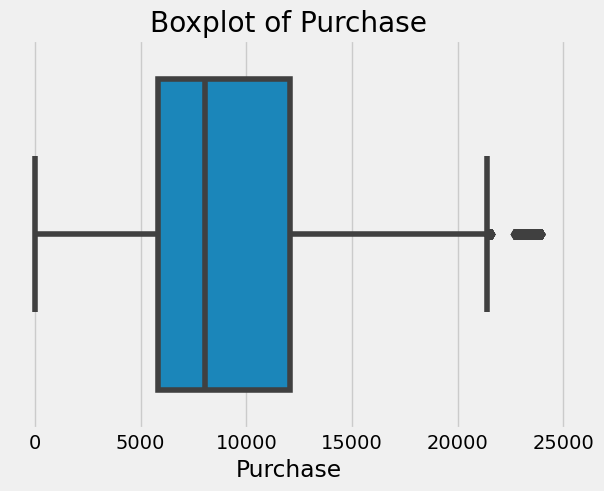

In [15]:
sns.boxplot(sales["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [16]:
sales["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [17]:
sales["Purchase"].skew()

0.6001400037087128

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

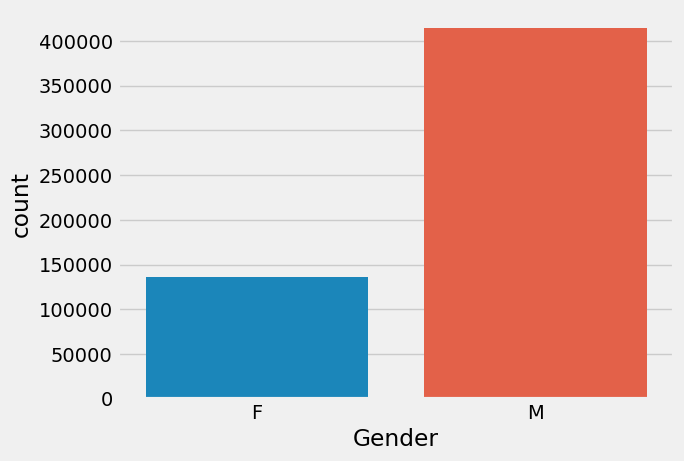

In [18]:
#Gender
sns.countplot(sales['Gender'])
plt.show()

In [19]:
sales['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are more males than females

<AxesSubplot:xlabel='Age', ylabel='count'>

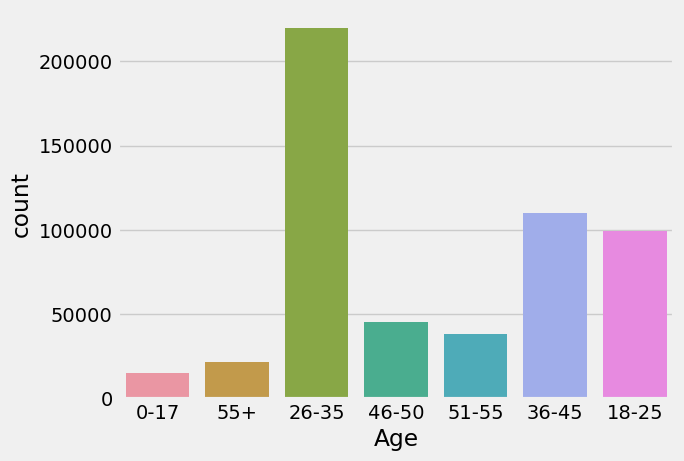

In [20]:
#Age Dist
sns.countplot(sales['Age'])

In [21]:
sales.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.( Don't forget %75 male gender) 

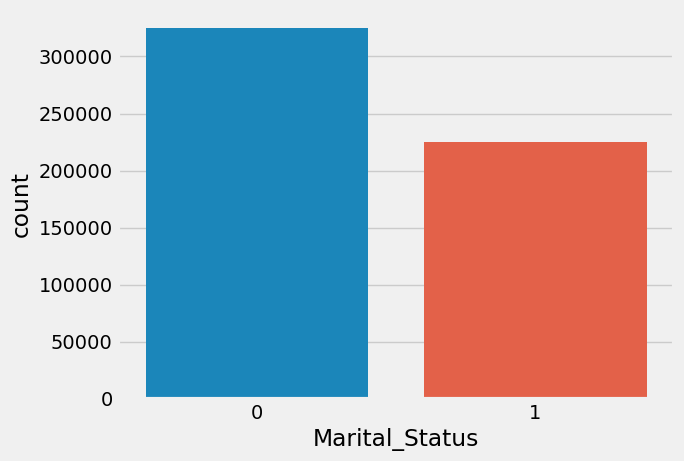

In [22]:
sns.countplot(sales['Marital_Status'])
plt.show()

There are more unmarried people in the dataset who purchase more

Which group (married or unmaried) pay more ? 

In [23]:
sales.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

We can explain that  married people pay more. 

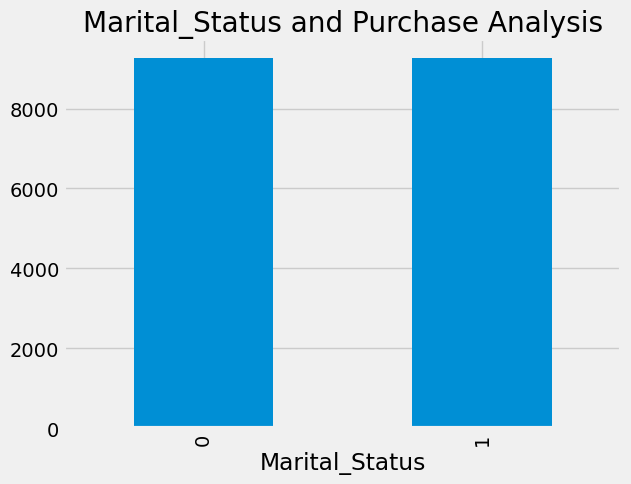

In [24]:
sales.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

## Occupation

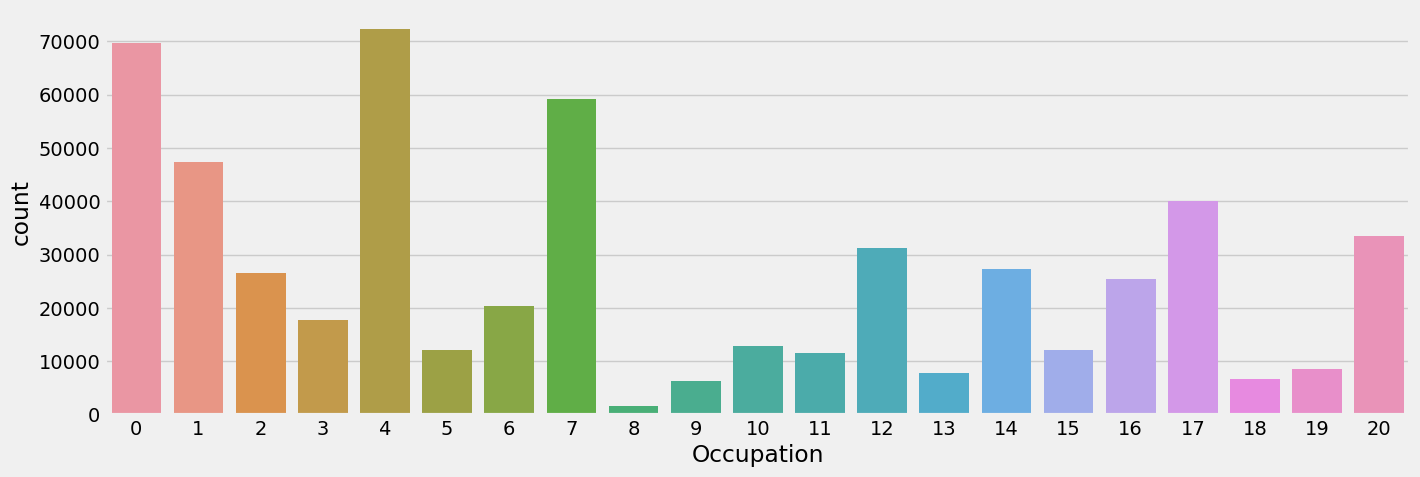

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(sales['Occupation'])
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but we can make groups of each field.

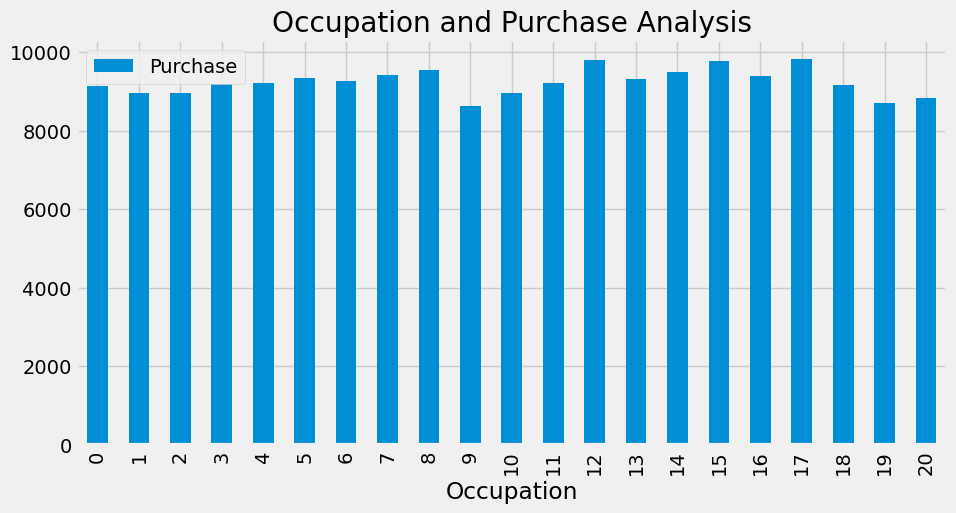

In [26]:
# Occupation purchase approach : 
occupation = pd.DataFrame(sales.groupby("Occupation").mean()["Purchase"])

occupation.plot(kind='bar',figsize=(10,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases

Which city purchase more ? 

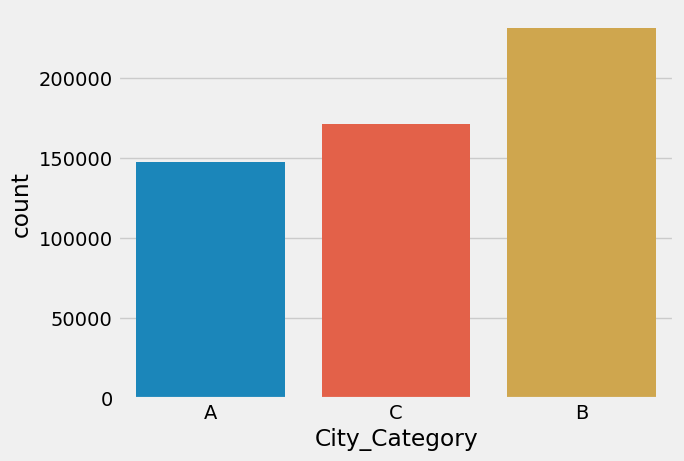

In [27]:
sns.countplot(sales['City_Category'])
plt.show()

It obviously city category B has made the most number of puchases.

 Let's look at  cities' purchase mean and total

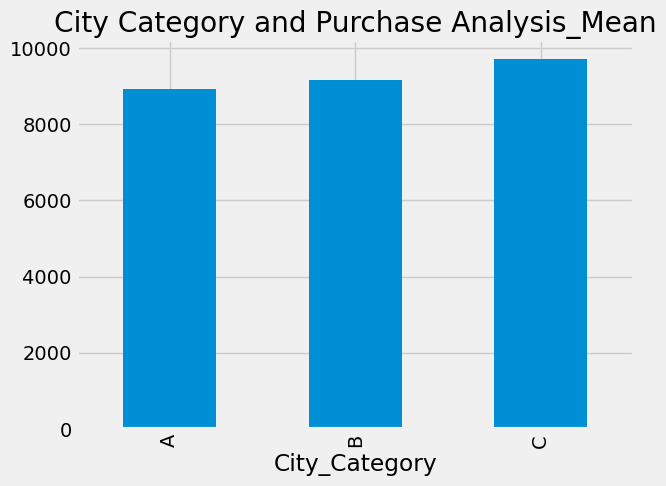

In [28]:
sales.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis_Mean")
plt.show()

In [29]:
sales.groupby("City_Category").sum()["Purchase"]

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'City Category and Purchase Analysis _Total')

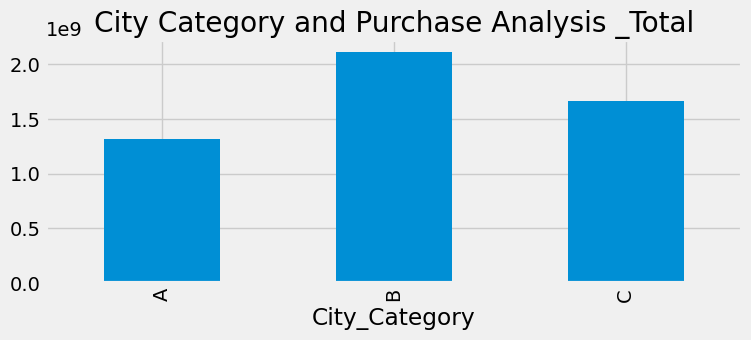

In [30]:
plt.figure(figsize=(8, 3))
sales.groupby("City_Category").sum()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis _Total")


Althoug B city purchase more , C city has more people to purchase.

## Stay_In_Current_City_Years  Analysis

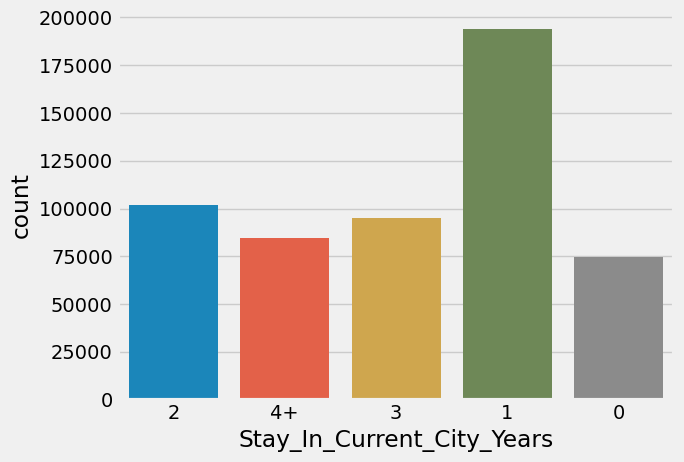

In [31]:
sns.countplot(sales['Stay_In_Current_City_Years'])
plt.show()

Again Let's Stay_In_Current_City_Years  purchase total ?  

Text(0.5, 1.0, 'Stay_In_Current_City_Years and Purchase Analysis _Total')

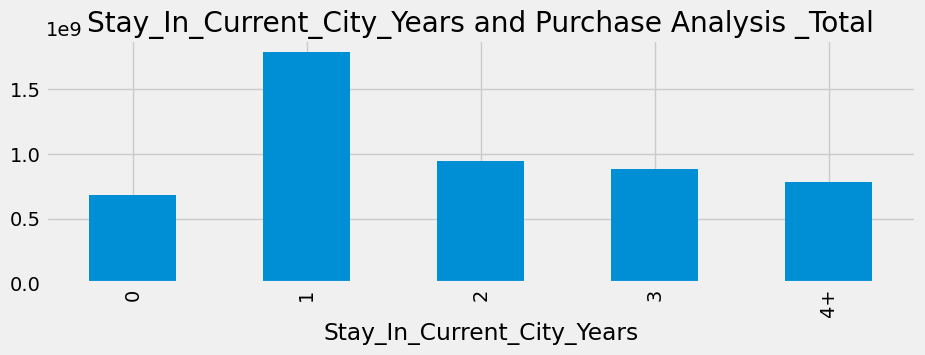

In [32]:
plt.figure(figsize=(10, 3))
sales.groupby("Stay_In_Current_City_Years").sum()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis _Total")

It looks like the longest and new are living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

#### Age

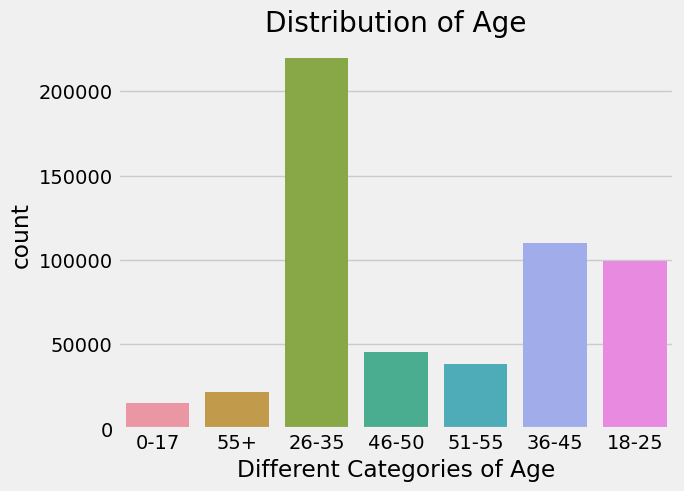

In [33]:
sns.countplot(sales['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Text(0.5, 1.0, 'Age and Purchase Analysis _Total')

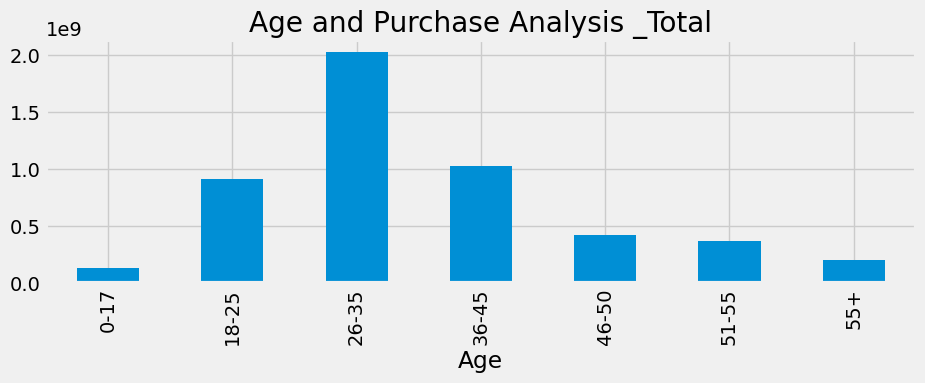

In [34]:
plt.figure(figsize=(10, 3))
sales.groupby("Age").sum()["Purchase"].plot(kind='bar')
plt.title("Age and Purchase Analysis _Total")

26-35 Age group makes the most of purchases in the age group . 

## Preprocessing the dataset

In [35]:
# check for null values
sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [36]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [37]:
sales['Product_Category_2']=sales['Product_Category_2'].fillna(sales['Product_Category_2'].mean())
sales['Product_Category_3']=sales['Product_Category_3'].fillna(sales['Product_Category_3'].mean())

In [38]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [39]:
# encoding values using dictionary
gender_dict = {'F':0, 'M':1}
sales['Gender'] = sales['Gender'].apply(lambda x: gender_dict[x])
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [40]:
#to improve the metric use one hot encoding  and label coding

cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    sales[col] = le.fit_transform(sales[col])
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,12.668243,7969


In [41]:
sales.Age.unique()

array([0, 6, 2, 4, 5, 3, 1])

In [42]:
sales.City_Category.unique()

array([0, 2, 1])

In [43]:
sales.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

### Corelation Matrix

<AxesSubplot:>

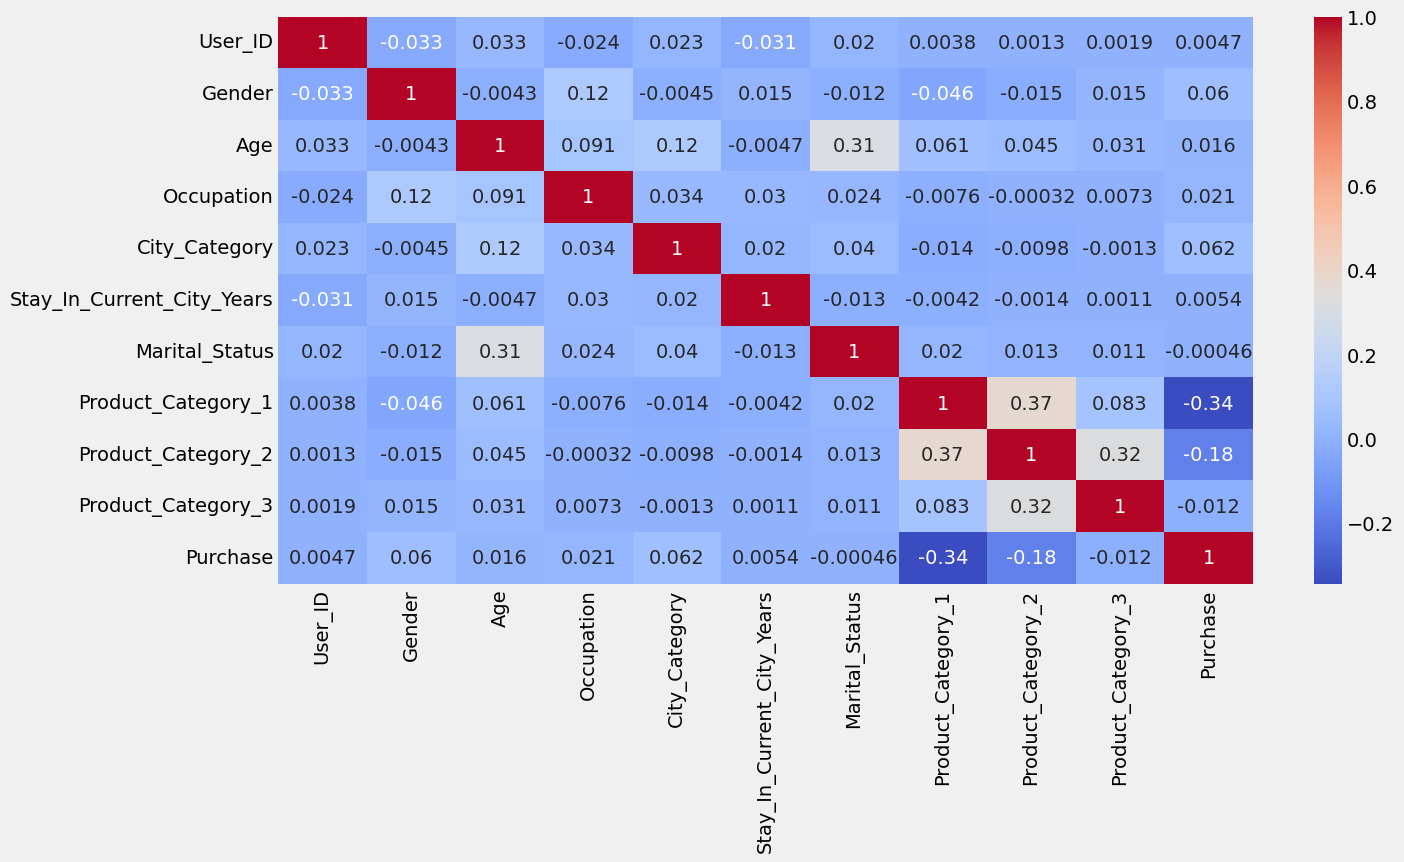

In [44]:
corr =sales.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [45]:
#Define X,y  for machine learning 
sales.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200


In [46]:
X = sales.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = sales['Purchase']

### Model training

In [47]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))

Regression

Results
MSE: 4684.550166044552
CV Score: 4691.912069110221


<AxesSubplot:title={'center':'Model Coefficients'}>

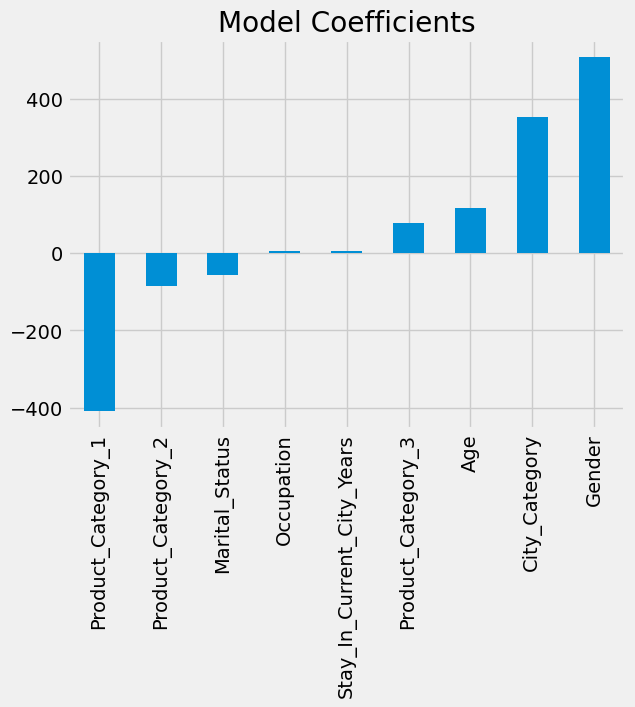

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

DecisionTreeRegressor

Results
MSE: 3362.0680404308923
CV Score: 3337.3902288625827


<AxesSubplot:title={'center':'Feature Importance'}>

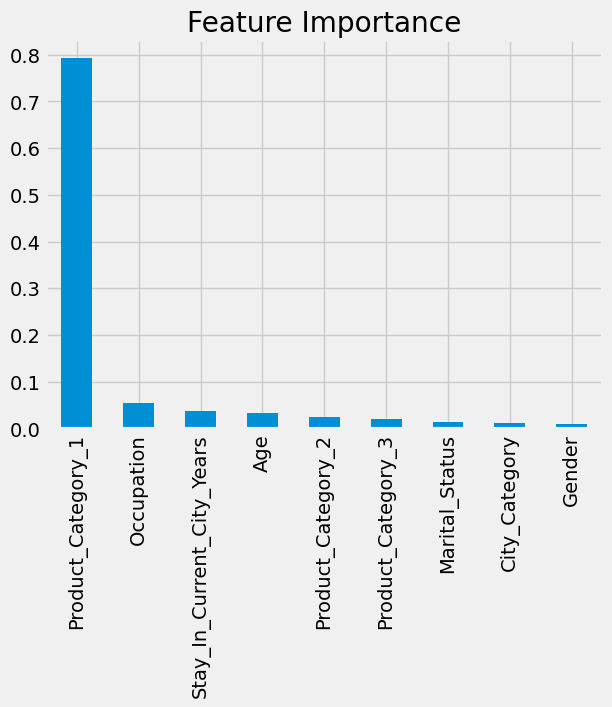

In [49]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')